<a href="https://colab.research.google.com/github/MedulHasan/Machine-Learning/blob/master/Mar_31%2C_2020_to_Feb_01%2C_2020(dse).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df  = pd.read_csv('Mar-31-2020-to-Feb-01-2020.csv')
df

,ID,DATE,TRADING_CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
0,1,3/25/2020,1JANATAMF,4.1,4.1,4.1,4.1,4.1,4.1,13,0.048,"11,670"
1,2,3/24/2020,1JANATAMF,4.1,4.1,4.1,4.1,4.1,4.1,13,0.251,"61,301"
2,3,3/23/2020,1JANATAMF,4.1,4.1,4.1,4.1,4.1,4.1,8,0.468,"114,124"
3,4,3/22/2020,1JANATAMF,4.1,4.2,4.1,4.1,4.1,4,34,1.344,"327,912"
4,5,3/19/2020,1JANATAMF,4,4,4,4,4,3.9,1,0.001,200
...,...,...,...,...,...,...,...,...,...,...,...,...
22377,22378,2/6/2020,ZEALBANGLA,40.1,42.9,40.1,42.9,40.8,40.8,24,0.310,"7,601"
22378,22379,2/5/2020,ZEALBANGLA,40.6,42.8,40.1,41.7,40.8,40.5,115,0.633,"15,310"
22379,22380,2/4/2020,ZEALBANGLA,40.6,41.9,39.2,41.9,40.5,40.1,9,0.025,615
22380,22381,2/3/2020,ZEALBANGLA,40.4,41.4,38.2,41.4,40.1,40.9,34,0.259,"6,418"


# Plot just one Company data which Trading code is "1JANATAMF"

In [ ]:
#df['TRADING_CODE'].unique()

In [ ]:
fig = df[df.ID <= 38]
fig.shape

(38, 12)

No handles with labels found to put in legend.


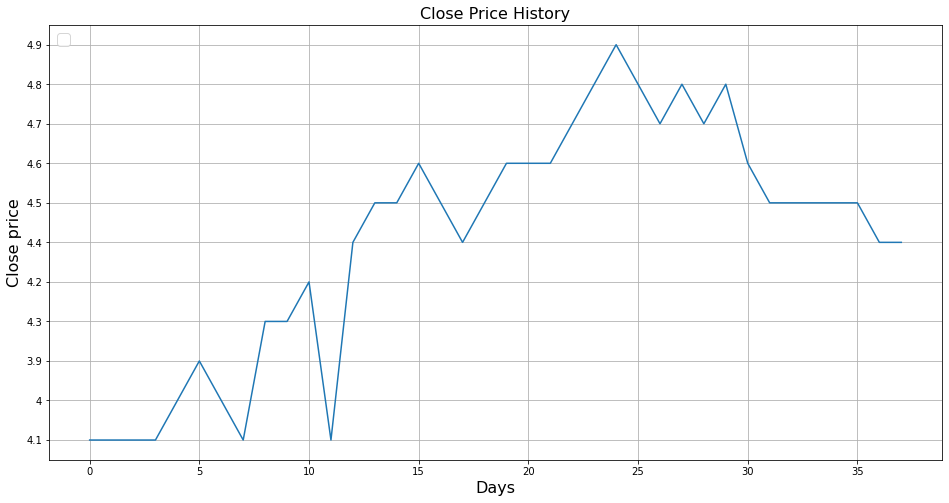

In [ ]:
#visulize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=16)
plt.plot(fig['CLOSEP*']) #, label=df_fig
plt.legend(loc="upper left", fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel(('Close price'), fontsize=16)
plt.grid(True)
plt.show()

# Data Preprocessing

In [ ]:
df.isnull().sum()

ID              0
DATE            0
TRADING_CODE    0
LTP*            0
HIGH            0
LOW             0
OPENP*          0
CLOSEP*         0
YCP             0
TRADE           0
VALUE (mn)      0
VOLUME          0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dummie = pd.get_dummies(df.TRADING_CODE)
dummie

,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,APEXFOOT,APEXSPINN,APEXTANRY,APOLOISPAT,APSCLBOND,ARAMIT,ARAMITCEM,ARGONDENIM,ASIAINS,ASIAPACINS,ATCSLGF,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
dummie.shape

(22382, 589)

In [ ]:
marge = pd.concat([df, dummie], axis='columns')
marge

,ID,DATE,TRADING_CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1,3/25/2020,1JANATAMF,4.1,4.1,4.1,4.1,4.1,4.1,13,0.048,"11,670",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3/24/2020,1JANATAMF,4.1,4.1,4.1,4.1,4.1,4.1,13,0.251,"61,301",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3/23/2020,1JANATAMF,4.1,4.1,4.1,4.1,4.1,4.1,8,0.468,"114,124",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3/22/2020,1JANATAMF,4.1,4.2,4.1,4.1,4.1,4,34,1.344,"327,912",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3/19/2020,1JANATAMF,4,4,4,4,4,3.9,1,0.001,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22377,22378,2/6/2020,ZEALBANGLA,40.1,42.9,40.1,42.9,40.8,40.8,24,0.310,"7,601",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22378,22379,2/5/2020,ZEALBANGLA,40.6,42.8,40.1,41.7,40.8,40.5,115,0.633,"15,310",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22379,22380,2/4/2020,ZEALBANGLA,40.6,41.9,39.2,41.9,40.5,40.1,9,0.025,615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22380,22381,2/3/2020,ZEALBANGLA,40.4,41.4,38.2,41.4,40.1,40.9,34,0.259,"6,418",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_df = marge.drop(['TRADING_CODE'], axis='columns')
final_df

,ID,DATE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1,3/25/2020,4.1,4.1,4.1,4.1,4.1,4.1,13,0.048,"11,670",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3/24/2020,4.1,4.1,4.1,4.1,4.1,4.1,13,0.251,"61,301",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3/23/2020,4.1,4.1,4.1,4.1,4.1,4.1,8,0.468,"114,124",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3/22/2020,4.1,4.2,4.1,4.1,4.1,4,34,1.344,"327,912",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3/19/2020,4,4,4,4,4,3.9,1,0.001,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22377,22378,2/6/2020,40.1,42.9,40.1,42.9,40.8,40.8,24,0.310,"7,601",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22378,22379,2/5/2020,40.6,42.8,40.1,41.7,40.8,40.5,115,0.633,"15,310",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22379,22380,2/4/2020,40.6,41.9,39.2,41.9,40.5,40.1,9,0.025,615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22380,22381,2/3/2020,40.4,41.4,38.2,41.4,40.1,40.9,34,0.259,"6,418",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_df = final_df.replace('[^\d.]', '', regex=True).astype(float)

In [ ]:
final_df.head()

,ID,DATE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1.0,3252020.0,4.1,4.1,4.1,4.1,4.1,4.1,13.0,0.048,11670.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,3242020.0,4.1,4.1,4.1,4.1,4.1,4.1,13.0,0.251,61301.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3232020.0,4.1,4.1,4.1,4.1,4.1,4.1,8.0,0.468,114124.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,3222020.0,4.1,4.2,4.1,4.1,4.1,4.0,34.0,1.344,327912.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3192020.0,4.0,4.0,4.0,4.0,4.0,3.9,1.0,0.001,200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.dtypes

ID             float64
DATE           float64
LTP*           float64
HIGH           float64
LOW            float64
                ...   
WMSHIPYARD     float64
YPL            float64
ZAHEENSPIN     float64
ZAHINTEX       float64
ZEALBANGLA     float64
Length: 600, dtype: object

# Split Data

In [ ]:
x = final_df.drop(['CLOSEP*'], axis=1)
x.head()

,ID,DATE,LTP*,HIGH,LOW,OPENP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,APEXFOOT,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1.0,3252020.0,4.1,4.1,4.1,4.1,4.1,13.0,0.048,11670.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,3242020.0,4.1,4.1,4.1,4.1,4.1,13.0,0.251,61301.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3232020.0,4.1,4.1,4.1,4.1,4.1,8.0,0.468,114124.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,3222020.0,4.1,4.2,4.1,4.1,4.0,34.0,1.344,327912.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3192020.0,4.0,4.0,4.0,4.0,3.9,1.0,0.001,200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = final_df.filter(['CLOSEP*'])
y

,CLOSEP*
0,4.1
1,4.1
2,4.1
3,4.1
4,4.0
...,...
22377,40.8
22378,40.8
22379,40.5
22380,40.1


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Accuracy

In [ ]:
lin_reg.score(xtest,ytest)

0.999853765670713

# Compare between close price and predicting price

In [ ]:
pred = lin_reg.predict(xtest)
pred

array([[ 8.77432648e+01],
       [ 1.72395392e-01],
       [-3.03672405e-02],
       ...,
       [-1.36217852e-01],
       [ 8.34785771e+02],
       [ 9.54845755e-02]])

In [ ]:
compare = ytest
compare['prediction'] = pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
compare.head(20)

,CLOSEP*,prediction
9953,86.9,87.743265
16407,0.0,0.172395
14105,0.0,-0.030367
4725,45.8,46.017743
12610,9.0,9.163501
1728,760.9,760.355937
10462,23.5,23.916679
11078,23.0,23.066588
7378,8.5,9.051392
9412,17.8,17.191531
